In [40]:
import random
import numpy as np 
arr = [random.randrange(1, 10, 1) for i in range(5)] #Generating array of 5 random numbers between integer 1 to 10 
arr2 = [random.randrange(1, 10, 1) for i in range(5)] #Generating array of random numbers between integers 1 to 10 
vector1 = np.array(arr) #Creating numpy array to perform vector operations
vector2 = np.array(arr2) #Creating numpy array to perform vector operations
print("This is the first vector: " + str(vector1))
print("This is the second vector: " + str(vector2))
matrix = np.outer(vector1,vector2) # Taking outer product of 2 vectors to generate a 2D matrice 
print("This is the matrice generated using vector 1 and vector 2 (outer product): " + str(matrix))

This is the first vector: [3 9 8 7 9]
This is the second vector: [2 2 4 1 5]
This is the matrice generated using vector 1 and vector 2 (outer product): [[ 6  6 12  3 15]
 [18 18 36  9 45]
 [16 16 32  8 40]
 [14 14 28  7 35]
 [18 18 36  9 45]]


In the above matrice each column is muliple of first vector to the integers in the second vector. One can also observe all the columns are linearly dependent and rank of the matrice is 1. 

If we are given any similar matrice (linearly dependent columns, Rank = 1), we can store that m * n matrice in m + n numbers (arrays of size m and n). This means that we store less information for more data. 

We can observe that the columns of the matrice vary depending upon columns of the second vector ( first vector has only one column in the outer product). All the information is captured from the matrice by storing what varies and dimensions of the matrice are also reduced. 




#PCA of multinormal data with step by step visualizations

In [41]:
import pandas as pd
import numpy as np


# Principal Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

In [42]:
import numpy.random as rnd
dim = 3
mean = [7,15,3.5]
covariance = [[1.5,0.8,0.8], [0.8,1.5,0.8],[0.8,0.8,1.5]]
genData = rnd.multivariate_normal(mean,covariance,size=(500))
print("Data shape ", genData.shape)

Data shape  (500, 3)


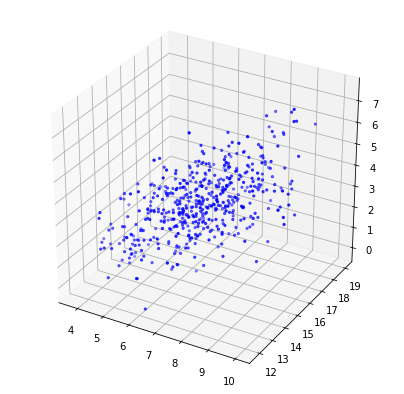

In [43]:
fig1 = plt.figure(figsize=(7,7))
ax1 = plt.axes(projection ="3d")
ax1.scatter3D(genData[:,0], genData[:,1],genData[:,2], color='blue', marker='.')

In [44]:
meanData= genData - np.mean(genData,axis=0)
stdData = np.std(genData,axis =0)
standardizedData = meanData/stdData


Text(0.5, 0.92, 'Scattered plot of mean-centered data')

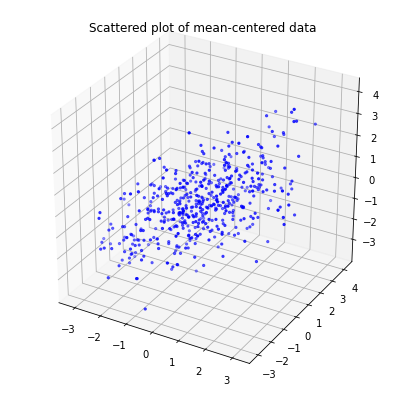

In [45]:
fig2 = plt.figure(figsize=(7,7))
ax2 = plt.axes(projection ="3d")
ax2.scatter3D(meanData[:,0], meanData[:,1],meanData[:,2], color='blue', marker='.')
ax2.set_title('Scattered plot of mean-centered data')

Text(0.5, 0.92, 'Scattered plot of standardized data')

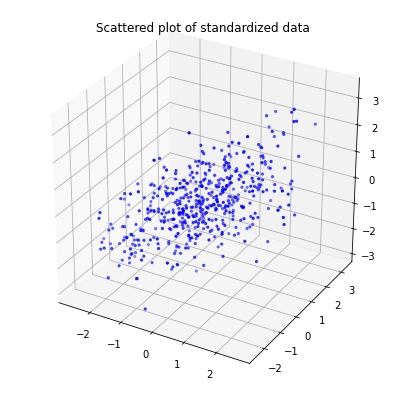

In [46]:
fig2 = plt.figure(figsize=(7,7))
ax2 = plt.axes(projection ="3d")
ax2.scatter3D(standardizedData[:,0], standardizedData[:,1],standardizedData[:,2], color='blue', marker='.')
ax2.set_title('Scattered plot of standardized data')

In [47]:
cov = np.cov(standardizedData.T)
print(cov.shape)
eig_values, eig_vectors = np.linalg.eig(cov)


(3, 3)


In [48]:
indices = np.arange(0,len(eig_values), 1)
indices = ([x for _,x in sorted(zip(eig_values, indices))])[::-1]
eig_values = eig_values[indices]
eig_vectors = eig_vectors[:,indices]
#print("Sorted Eigen vectors ", eig_vec.shape)
#print("Sorted Eigen values ", eig_val.shape, "\n")
eig_vectors = eig_vectors[:,:2]

In [49]:
sum_eig_values = np.sum(eig_values)
explained_variance = eig_values/ sum_eig_values
print("Explained variance ", explained_variance[:2])

Explained variance  [0.68243514 0.17715872]


In [50]:
pca_data = meanData.dot(eig_vectors)
print("Transformed data ", pca_data.shape)

Transformed data  (500, 2)


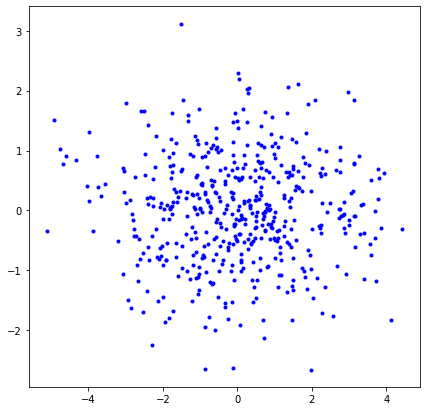

In [51]:
figx = plt.figure(figsize=(7,7))
figx = plt.scatter(pca_data[:,0], pca_data[:,1], color='blue', marker='.')


In [52]:
reconstructedData = pca_data.dot(eig_vectors.T) + np.mean(genData,axis =0)
print(reconstructedData.shape)

(500, 3)


Text(0.5, 0.92, 'Scattered plot of reconstructed data')

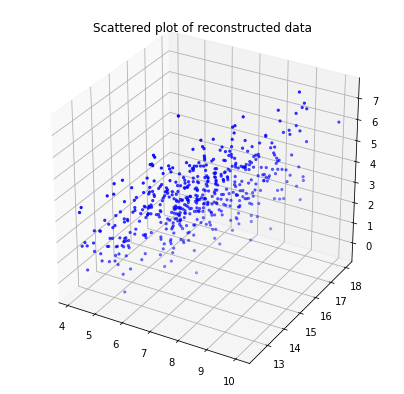

In [53]:
fig2 = plt.figure(figsize=(7,7))
ax2 = plt.axes(projection ="3d")
ax2.scatter3D(reconstructedData[:,0], reconstructedData[:,1],reconstructedData[:,2], color='blue', marker='.')
ax2.set_title('Scattered plot of reconstructed data')

#PCA of Iris Dataset


In [54]:
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import load_iris #importing 10 dimension diabetes dataset

# Principal Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

In [55]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
print(dataset.feature_names)
dataset.data.shape


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(150, 4)

In [56]:
print(df.dtypes)
print(df.columns)
print("Data shape:",df.shape)
print(df.head())
print(df.describe())
print(df.info())


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Data shape: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min           

In [57]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:

X = dataset.data
y = dataset.target
#labels = dataset.target_names
#print(labels)
#Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
 #The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
principalComponents = pca.fit_transform(X) # project the original data into the PCA space
#print(pca.get_covariance()) 
principalComponentsDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalComponentsDf.head())
print(pca.explained_variance_ratio_)
print(pca.mean_)

   principal component 1  principal component 2
0              -2.264703               0.480027
1              -2.080961              -0.674134
2              -2.364229              -0.341908
3              -2.299384              -0.597395
4              -2.389842               0.646835
[0.72962445 0.22850762]
[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


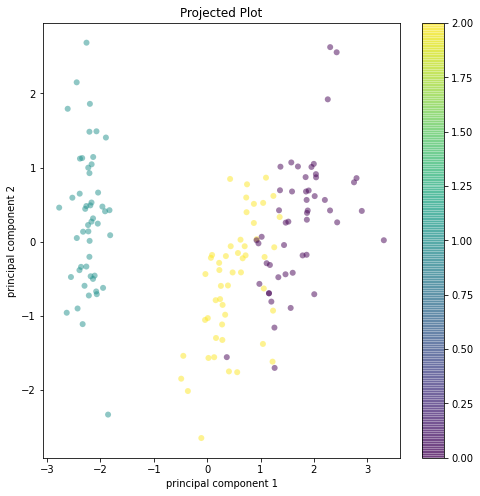

In [35]:
plt.figure(figsize= (8,8))
plt.scatter(principalComponentsDf['principal component 1'], principalComponentsDf['principal component 2'],
            c=y, edgecolor='none', alpha=0.5,
            )
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Projected Plot')
plt.colorbar();



#PCA of a 3*5 Matrix ( Used as example in report)

In [36]:
import pandas as pd  
      
# List1  

lst = [[165,68, 45000,23,3], [120,67, 89000,35,15],   [145,69, 120000,48,8] ] 
# creating df object with columns specified    
column =['Height', 'Weight','Income','Age','Distance Travelled'] 
df = pd.DataFrame(lst, columns = column) 
#Creating table using pandas dataframe
print(df)

   Height  Weight  Income  Age  Distance Travelled
0     165      68   45000   23                   3
1     120      67   89000   35                  15
2     145      69  120000   48                   8


In [37]:

x = df.loc[:, column].values



scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

pca = PCA(n_components=2)
#pca.get_covariance(x)

principalComponents = pca.fit_transform(x)
covarianceMat = pca.get_covariance()
print(covarianceMat)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)
print(pca.explained_variance_ratio_)

[[ 1.5         0.83162393 -0.79586214 -0.63408278 -1.49923841]
 [ 0.83162393  1.5         0.61691853  0.77979208 -0.87097699]
 [-0.79586214  0.61691853  1.5         1.48869847  0.75494683]
 [-0.63408278  0.77979208  1.48869847  1.5         0.59044792]
 [-1.49923841 -0.87097699  0.75494683  0.59044792  1.5       ]]
   principal component 1  principal component 2
0               2.399409              -0.273785
1              -1.481993              -1.608451
2              -0.917416               1.882235
[0.58634127 0.41365873]


In [38]:
from pandas.core.common import standardize_mapping
def PCA(X , numberOfComponents): # X is input matrix and num
    
    meanMatrix = X - np.mean(X , axis = 0) #Each value in matrix - mean along columns of matrix
    stdMatrix = np.std(X , axis = 0) #Standard Deviation along columns of matrix
    standardizedMatrix = meanMatrix/stdMatrix # Standardized Matrix 
    print('Standardized Matrix:'+ str(standardizedMatrix))
    meanSM = np.mean(standardizedMatrix,axis=0)
    stdSM = np.std(standardizedMatrix,axis=0)
    print('Std of columns of Standarized Matrix:' + str(stdSM)) # To check if stardard deviation of standardized matrix column is 1 
    
    cov_mat = np.cov(standardizedMatrix , rowvar = False)
    cov_mat = cov_mat
    #print(np.std(cov_mat , axis = 0))
    #cov_mat = np.round(cov_mat)
    print('Covariance Matrix:' + str(cov_mat))
  
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    #eigen_values = np.round (eigen_values,decimals=3)
    
    
    
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    print("Eigenvectors:" + str(sorted_eigenvectors))
    print("Eigenvalues:" + str(sorted_eigenvalue))
    
    eigenvector_subset = sorted_eigenvectors[:,0:numberOfComponents]
     
  
    X_reduced = np.dot(eigenvector_subset.transpose() , standardizedMatrix.transpose() ).transpose()
    sum_eigenvalues = np.sum(eigen_values)
    prop_var = [i/sum_eigenvalues for i in sorted_eigenvalue]
    prop_var = prop_var[0:numberOfComponents]
    return X_reduced, prop_var

PCA(lst,2)

Standardized Matrix:[[ 1.1769647   0.         -1.28906909 -1.20809282 -1.15138528]
 [-1.26750044 -1.22474487  0.14082267 -0.03265116  1.28684238]
 [ 0.09053575  1.22474487  1.14824642  1.24074398 -0.13545709]]
Std of columns of Standarized Matrix:[1. 1. 1. 1. 1.]
Covariance Matrix:[[ 1.5         0.83162393 -0.79586214 -0.63408278 -1.49923841]
 [ 0.83162393  1.5         0.61691853  0.77979208 -0.87097699]
 [-0.79586214  0.61691853  1.5         1.48869847  0.75494683]
 [-0.63408278  0.77979208  1.48869847  1.5         0.59044792]
 [-1.49923841 -0.87097699  0.75494683  0.59044792  1.5       ]]
Eigenvectors:[[-0.52522177  0.30409715  0.72410727 -0.21674728  0.24567519]
 [-0.07861904  0.68900591 -0.51057118  0.02685336  0.50762769]
 [ 0.4951748   0.36869215  0.08844    -0.72327032 -0.29652391]
 [ 0.45350128  0.43814653  0.3941528   0.64857958 -0.16233392]
 [ 0.51681684 -0.32386648  0.22761299 -0.09232602  0.75344482]]
Eigenvalues:[4.39755955e+00 3.10244045e+00 1.02014891e-15 3.93628742e-16


(array([[-2.39940896, -0.27378462],
        [ 1.48199339, -1.60845062],
        [ 0.91741557,  1.88223524]]), [0.5863412734124072, 0.4136587265875927])

# References:

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb#scrollTo=Oj6q6IWvMQft

https://github.com/AdityaDutt/PCATutorial/blob/main/PCA_tutorial.ipynb
